<a href="https://colab.research.google.com/github/yousefhm/Tele-comunication-analysis-/blob/master/tele_communication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 

In [ ]:
#import data 
cd=pd.read_csv('/content/custmoredataset.csv')

In [ ]:
cd.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
#check null value 
cd.isnull().sum().sum()

0

In [ ]:
print (cd.shape)
print (cd.columns)
print (cd.describe())

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f87da1908>,
      dtype=object)

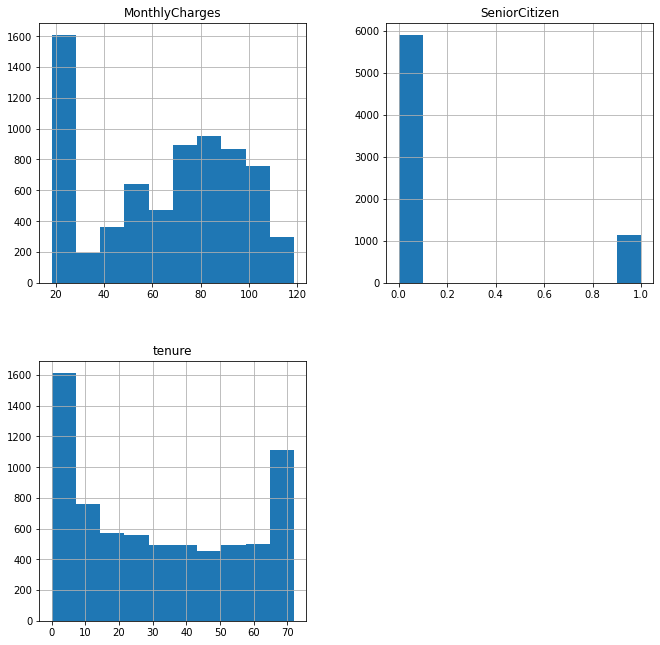

In [ ]:
cd[cd.dtypes[(cd.dtypes=="float64")|(cd.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [ ]:
#SeniorCitizen gets converted into a qualitative variable
cd['SeniorCitizen'] = cd.SeniorCitizen.astype('object')
cd.SeniorCitizen

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: object

In [ ]:
cd['TotalCharges'] = cd['TotalCharges'].replace(" ",np.nan)
cd.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
cd['TotalCharges'].isnull().sum()
#we have here 11 missing value in total charges column 

11

In [ ]:
#try to understand why we have 11 missing value
#show the row that have missing value 
cd1 = cd[cd.isnull().any(axis=1)]
print (cd1)

      customerID  gender SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
488   4472-LVYGI  Female             0  ...          52.55          NaN     No
753   3115-CZMZD    Male             0  ...          20.25          NaN     No
936   5709-LVOEQ  Female             0  ...          80.85          NaN     No
1082  4367-NUYAO    Male             0  ...          25.75          NaN     No
1340  1371-DWPAZ  Female             0  ...          56.05          NaN     No
3331  7644-OMVMY    Male             0  ...          19.85          NaN     No
3826  3213-VVOLG    Male             0  ...          25.35          NaN     No
4380  2520-SGTTA  Female             0  ...          20.00          NaN     No
5218  2923-ARZLG    Male             0  ...          19.70          NaN     No
6670  4075-WKNIU  Female             0  ...          73.35          NaN     No
6754  2775-SEFEE    Male             0  ...          61.90          NaN     No

[11 rows x 21 columns]


In [ ]:
#count number of how many churn yes or no 
churn_yes = cd[cd['Churn'] == 'Yes']
print ('Count "Yes" is :',len(churn_yes))
churn_no = cd[cd['Churn'] == 'No']
print ('Count "No" is :',len(churn_no))

Count "Yes" is : 1869
Count "No" is : 5174


In [ ]:
#chart ot visualize churn yes or no
import plotly.graph_objects as go

labels = ['No','Yes']
values = [5174, 1869 ]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [ ]:
#show case of churn yes 
cd2 = cd.loc[cd['Churn'] == 'Yes']
cd2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


In [ ]:
#subset Yes to Male or female
male_count = cd2[cd2['gender'] == 'Male']
print (len(male_count))
female_count = cd2[cd2['gender'] == 'Female']
print (len(female_count))

930
939


In [ ]:
#chart ot visualize yes (Male or Female)
import plotly.graph_objects as go

labels = ['Male','Female']
values = [930, 939 ]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [ ]:
Senior_male_count = male_count[male_count['SeniorCitizen'] == 1]
print (len(Senior_male_count))
Junior_male_count = male_count[male_count['SeniorCitizen'] == 0]
print (len(Junior_male_count))

236
694


In [ ]:
#chart ot visualize yes "Male"(Senior or Junior)
import plotly.graph_objects as go

labels = ['Senior_male_count','Junior_male_count']
values = [236, 694 ]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [ ]:
Senior_female_count = female_count[female_count['SeniorCitizen'] == 1]
print (len(Senior_female_count))
Junior_female_count = female_count[female_count['SeniorCitizen'] == 0]
print (len(Junior_female_count))

240
699


In [ ]:
#chart ot visualize yes "Female"(Senior or Junior)
import plotly.graph_objects as go

labels = ['Senior_female_count','Junior_female_count']
values = [240, 699]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [ ]:
# Total count senior and junior with Churn "Yes"
Senior_total_count = Senior_female_count + Senior_male_count
Junior_total_count = Junior_female_count + Junior_male_count
print ("Total Senior Count :",len(Senior_total_count))
print ("Total Junior Count :",len(Junior_total_count))
total_yes = Senior_total_count + Junior_total_count
print ("Total'Yes'Count :",len(total_yes))

Total Senior Count : 476
Total Junior Count : 1393
Total'Yes'Count : 1869


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



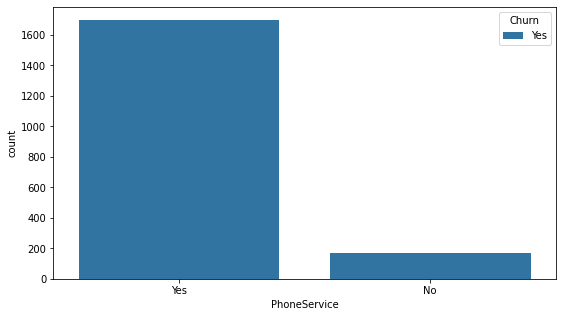

In [ ]:
import seaborn as sns
plt.figure(figsize = (9,5))
sns.countplot(cd2.PhoneService, hue = cd2.Churn)

Text(0.5, 0, 'Churn')

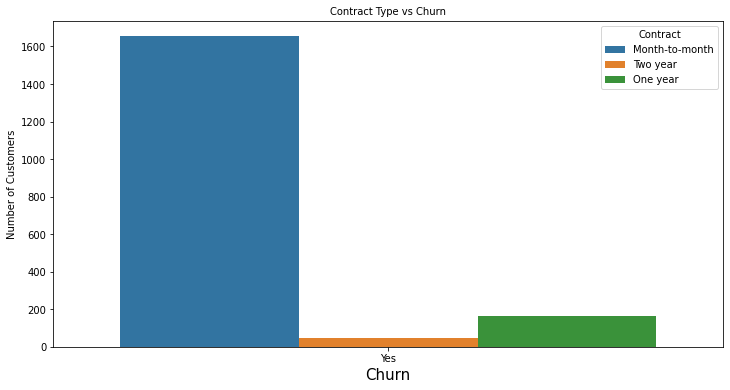

In [ ]:
# check the contract type in order check the list of customers who churned the most
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="Contract", data=cd2);
ax.set_title('Contract Type vs Churn', fontsize=10)
ax.set_ylabel('Number of Customers', fontsize =10)
ax.set_xlabel('Churn', fontsize = 15)